In [24]:
from IPython.display import display, Math

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))


In [32]:
import numpy as np
from numpy.linalg import eig, inv

A= np.array([[2, 1], 
              [1, 2]])
w,v=eig(A)

print(w)

v1 = np.array([[1],[1]])
v2 = np.array([[-1],[1]])
V = np.column_stack((v1,v2))

print_matrix(V)

L = np.matmul(inv(V),np.matmul(A,V))

print_matrix(L)


[3. 1.]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

[-5.55463662+49.56134687j -5.55463662-49.56134687j
 -0.95138748+10.74028103j -0.95138748-10.74028103j]


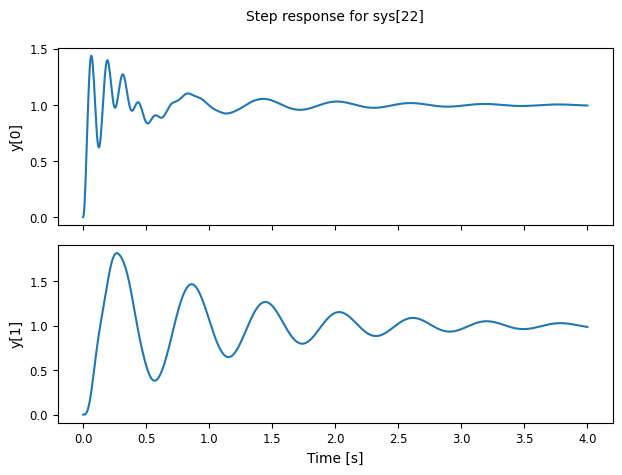

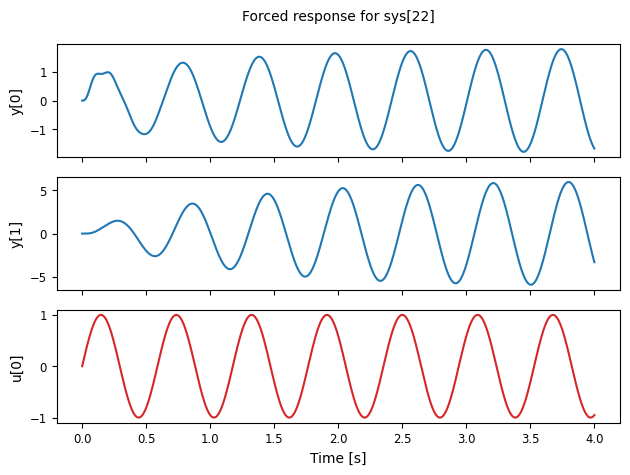

In [23]:
import control as ct
import numpy as np
from numpy.linalg import eig, inv
import math

M   = 332;                        # Sprung mass                   [kg]
m   = 100;                         # Unsprung mass                 [kg]
Ks  = 48000;                        #Spring constant suspension    [N/m]
Kt  = 200000;                      # Spring constant tire          [N/m]
Cs  = 1000;                        # Damping constant suspension   [N.s/m]



A = np.array([ [0, 1, 0,0 ],[-(Ks+Kt)/m,-Cs/m,Ks/m ,Cs/m],[0,0,0,1],[Ks/M,Cs/M,-Ks/M,-Cs/M]])
B = np.array([[0],[Kt/m], [0],[0]])
C = np.array([[1, 0, 0, 0],
      [0, 0, 1, 0 ]])
D = np.array([[0], [0]])

sys = ct.StateSpace(A,B,C,D)

w,v=eig(A)

timepts = np.linspace(0, 4, 1000)

print(w)
response = ct.step_response(sys,timepts) #timepts is optional

response.plot()

freq = 1.7

response = ct.forced_response(sys,timepts,np.sin(2*math.pi*freq*timepts))

response.plot()




[  0. -14.]


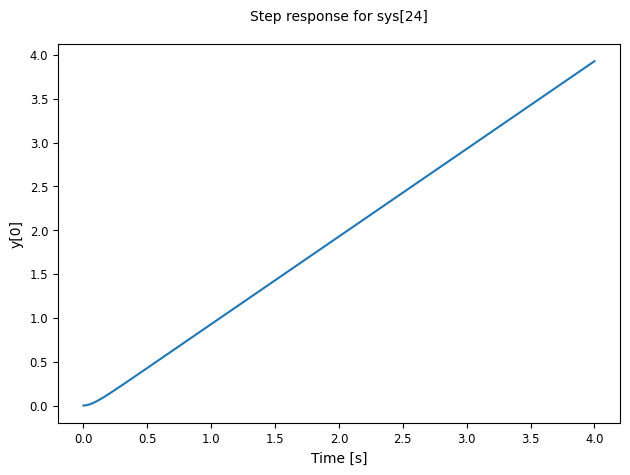

In [29]:
import control as ct
import numpy as np
from numpy.linalg import eig, inv


A = np.array([ [0, 1],[0, -14]])
B = np.array([[0],[14]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys = ct.StateSpace(A,B,C,D)

w,v=eig(A)

timepts = np.linspace(0, 4, 1000)

print(w)
response = ct.step_response(sys,timepts) #timepts is optional

response.plot()